# Detecção de Outliers (Valores Atípicos)

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sweetviz as sv

# Importando o dataset
df_clientes = pd.read_csv('../../docs/datasets_aula/churn_customers.csv')
df_contratos = pd.read_csv('../../docs/datasets_aula/churn_contracts.csv')
df_servicos = pd.read_csv('../../docs/datasets_aula/churn_services.csv')

df_churn = pd.merge(df_clientes, df_contratos, on='customerID', how='left')
df_churn = pd.merge(df_churn, df_servicos, on='customerID', how='left')

# Corrige valores nulos de TotalCharges
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(0)

/home/jakunzler/.local/share/virtualenvs/analise_exploratoria-mLN5YKDd/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   float64
 11  Churn             7043 non-null   object 
 12  PhoneService      7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


## Criando visualizações com Boxplot

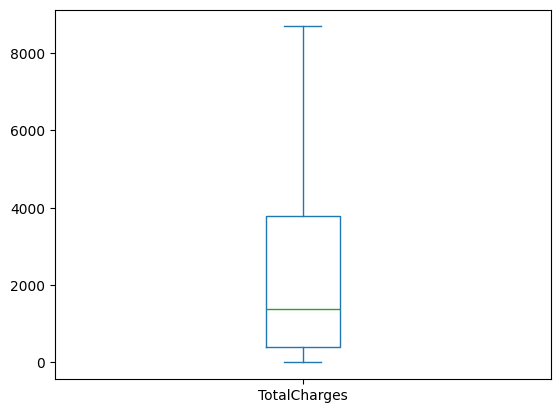

In [3]:
# Boxplot para detectar outliers
df_churn.plot.box(column='TotalCharges')
plt.show()

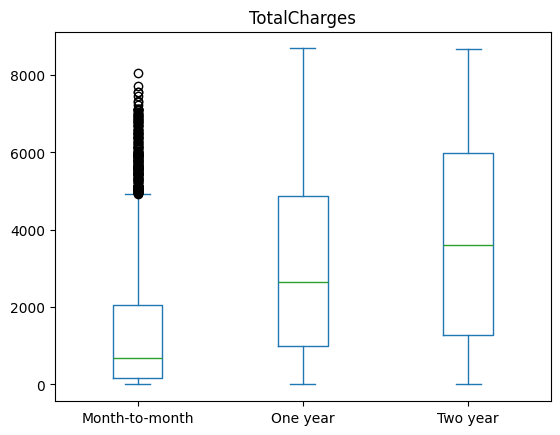

In [4]:
# Boxplot para detectar outliers
df_churn.plot.box(column='TotalCharges', by='Contract')
plt.show()

<Axes: xlabel='TotalCharges'>

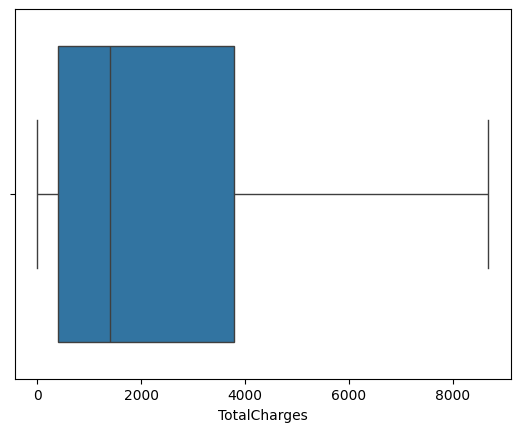

In [5]:
sns.boxplot(x=df_churn['TotalCharges'])

<Axes: xlabel='TotalCharges', ylabel='Contract'>

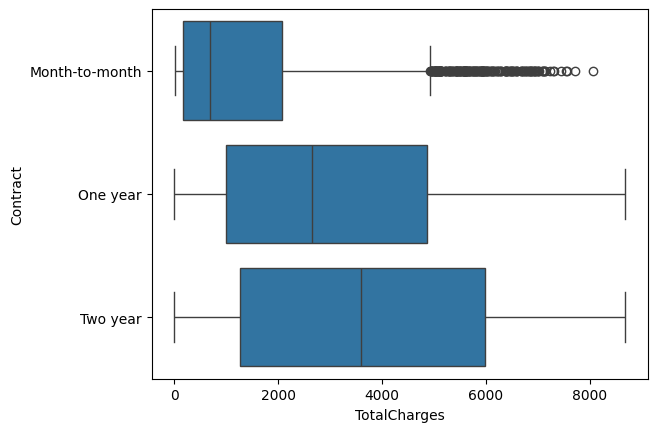

In [6]:
sns.boxplot(x=df_churn['TotalCharges'], y=df_churn['Contract'])

In [7]:
# Criar um dataframe somente com clientes de contrato mensal
df_churn_mensal = df_churn[df_churn['Contract'] == 'Month-to-month']
df_churn_mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3875 non-null   object 
 1   gender            3875 non-null   object 
 2   SeniorCitizen     3875 non-null   int64  
 3   Partner           3875 non-null   object 
 4   Dependents        3875 non-null   object 
 5   tenure            3875 non-null   int64  
 6   Contract          3875 non-null   object 
 7   PaperlessBilling  3875 non-null   object 
 8   PaymentMethod     3875 non-null   object 
 9   MonthlyCharges    3875 non-null   float64
 10  TotalCharges      3875 non-null   float64
 11  Churn             3875 non-null   object 
 12  PhoneService      3875 non-null   object 
 13  MultipleLines     3875 non-null   object 
 14  InternetService   3875 non-null   object 
 15  OnlineSecurity    3875 non-null   object 
 16  OnlineBackup      3875 non-null   object 
 17  

In [8]:
df_churn_mensal.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,3875.000000,3875.000000,3875.000000,3875.000000
mean,0.208258,18.036645,66.398490,1369.254581
std,0.406115,17.689054,26.926599,1613.879008
min,0.000000,1.000000,18.750000,18.850000
25%,0.000000,3.000000,45.850000,160.100000
50%,0.000000,12.000000,73.250000,679.550000
75%,0.000000,29.000000,88.875000,2066.500000
max,1.000000,72.000000,117.450000,8061.500000


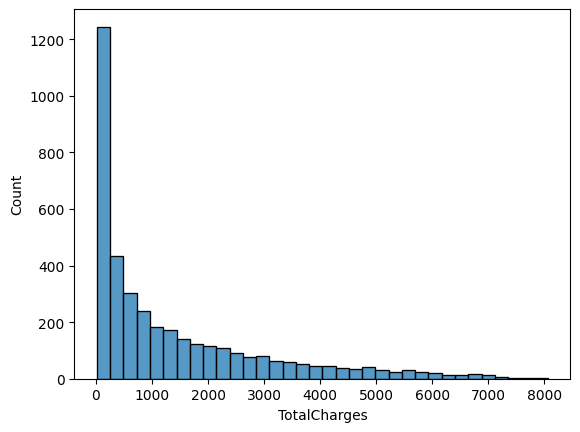

In [9]:
# Histograma para verificar a distribuição dos valores
sns.histplot(df_churn_mensal['TotalCharges'])
plt.show()

In [10]:
# Método de Tukey - IQR (Distribuição não normal)
# Calcular o IQR
Q1 = df_churn_mensal['TotalCharges'].quantile(0.25)
Q3 = df_churn_mensal['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Identificar outliers
outliers_inferior = df_churn_mensal[df_churn_mensal['TotalCharges'] < Q1 - 1.5 * IQR]
outliers_superior = df_churn_mensal[df_churn_mensal['TotalCharges'] > Q3 + 1.5 * IQR]
print(outliers_inferior)
print(outliers_superior)

160.1 2066.5 1906.4
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies]
Index: []

[0 rows x 21 columns]
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
13    0280-XJGEX    Male              0      No         No      49   
61    1215-FIGMP    Male              0      No         No      60   
93    6067-NGCEU  Female              0      No         No      65   
110   0486-HECZI    Male              0     Yes         No      55   
197   6168-YBYNP    Male              0      No         No      59   
...          ...     ...            ...     ...        ...     ...   
6897  2363-BJLSL    Male              0      No         No      62   
6952  6394-MFYNG  Female              0      No         No      48   
6965  7789

In [11]:
z = np.abs(zscore(df_churn_mensal['TotalCharges']))

In [12]:
df_churn_mensal_zscore = df_churn_mensal[z > 3.0]
print(df_churn_mensal_zscore)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
93    6067-NGCEU  Female              0      No         No      65   
197   6168-YBYNP    Male              0      No         No      59   
339   1343-EHPYB    Male              0     Yes         No      63   
402   0979-PHULV    Male              0     Yes        Yes      69   
445   7752-XUSCI  Female              0      No         No      60   
...          ...     ...            ...     ...        ...     ...   
6565  1548-FEHVL    Male              0     Yes         No      61   
6587  7426-GSWPO    Male              1      No         No      64   
6713  4989-LIXVT    Male              1      No         No      68   
7023  1035-IPQPU  Female              1     Yes         No      63   
7034  0639-TSIQW  Female              0      No         No      67   

            Contract PaperlessBilling              PaymentMethod  \
93    Month-to-month              Yes    Credit card (automatic)   
197   Month-to-month   

## Automatizando o processo de detecção de outliers

In [13]:
sv_churn_report = sv.analyze(df_churn, target_feat='Churn')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [14]:
sv_churn_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



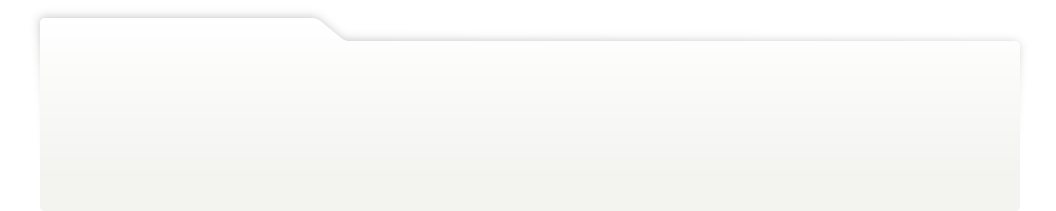
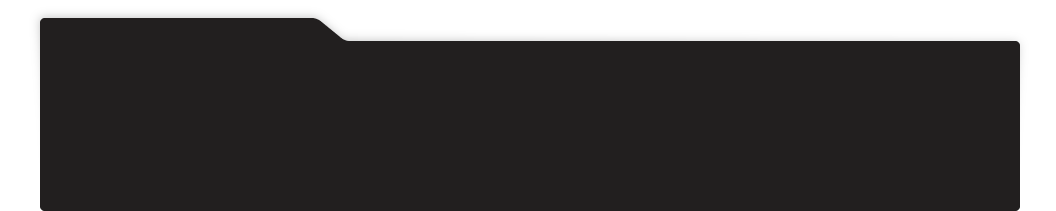
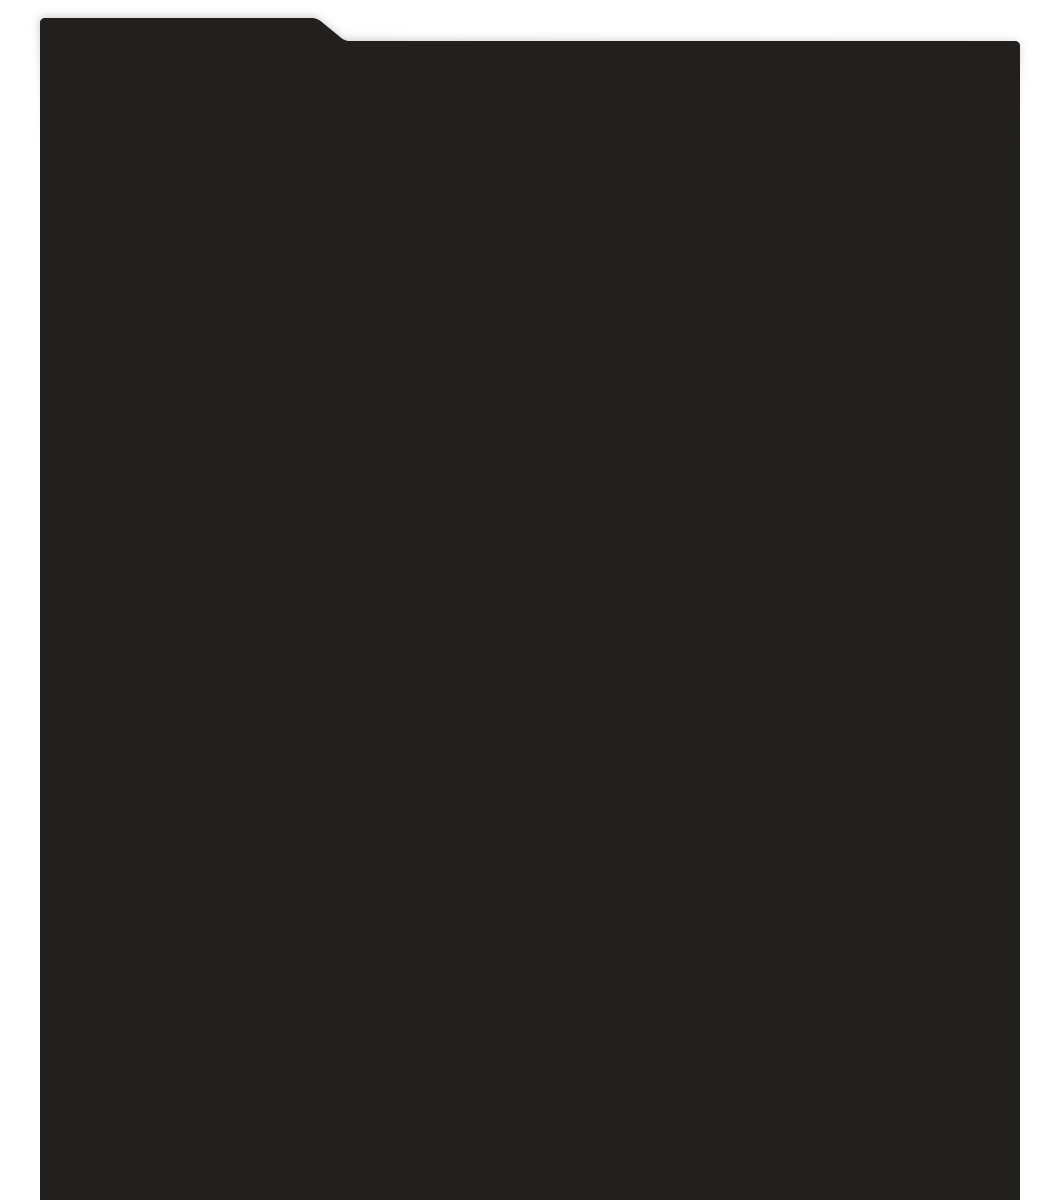
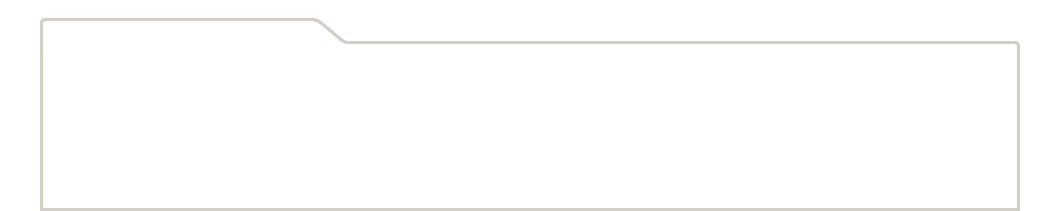
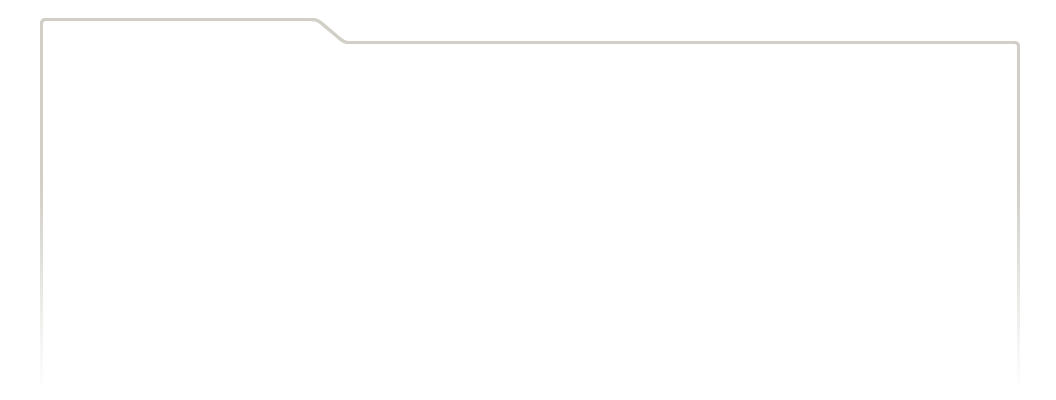
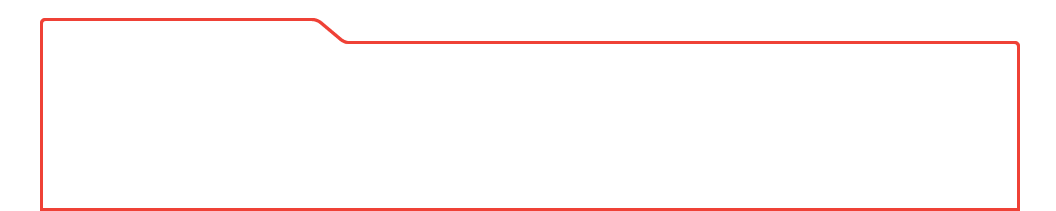
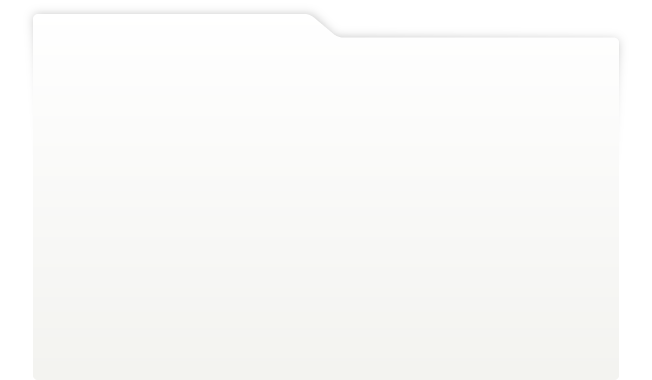
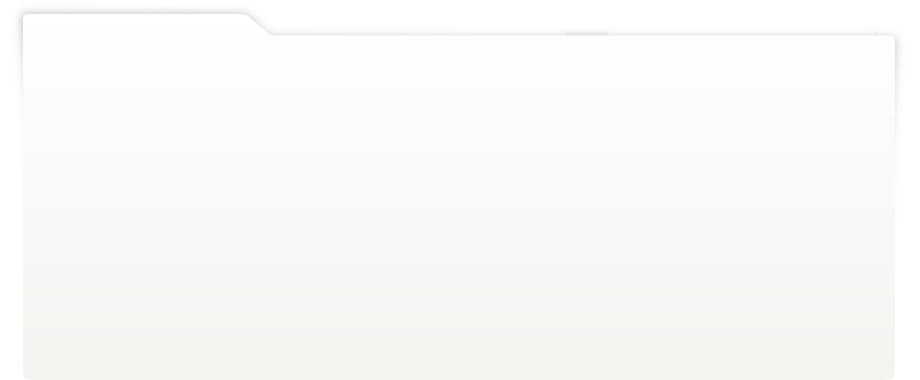
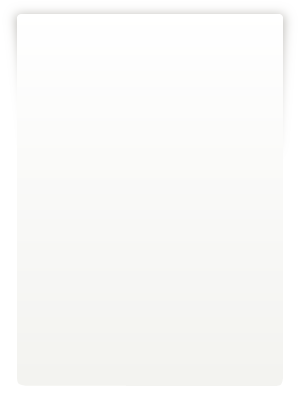
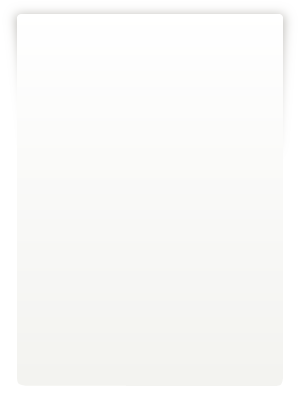
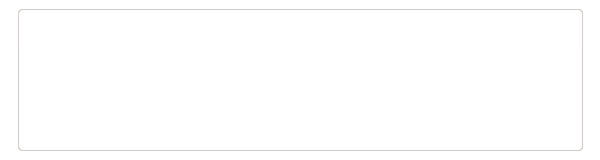
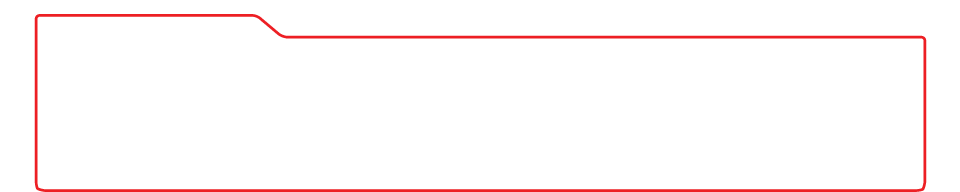
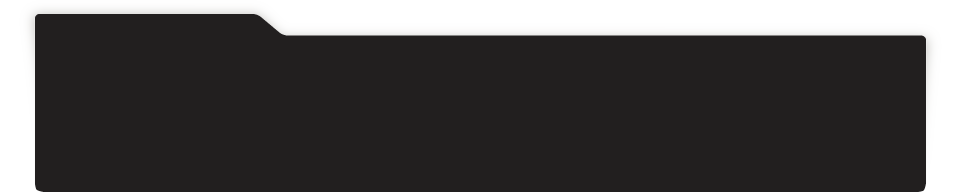
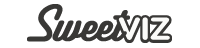
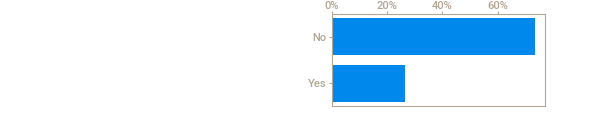
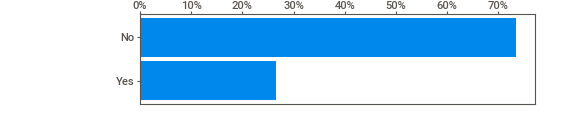
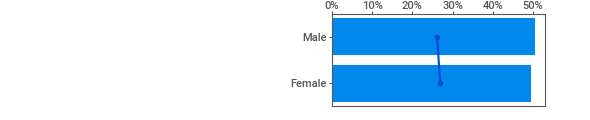
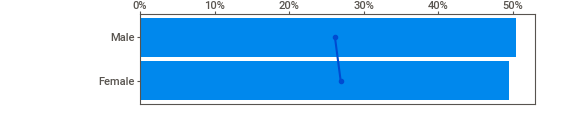
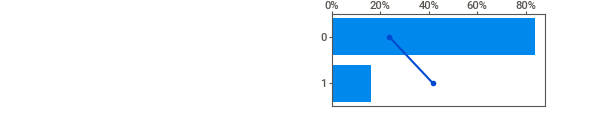
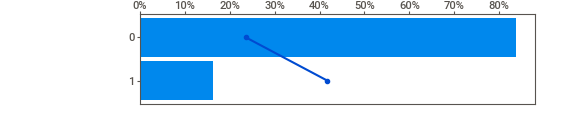
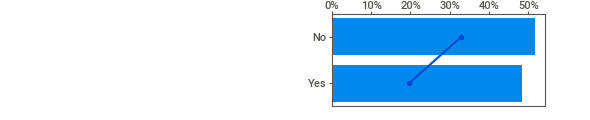
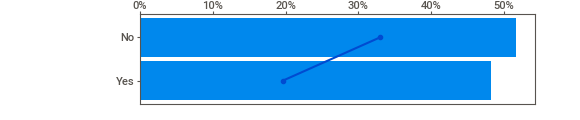
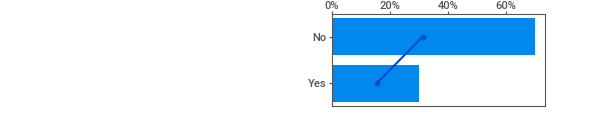
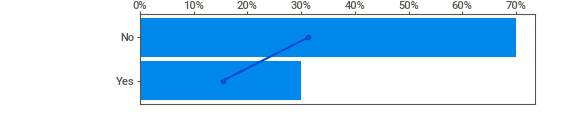
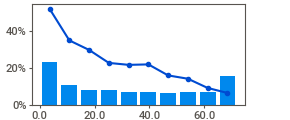
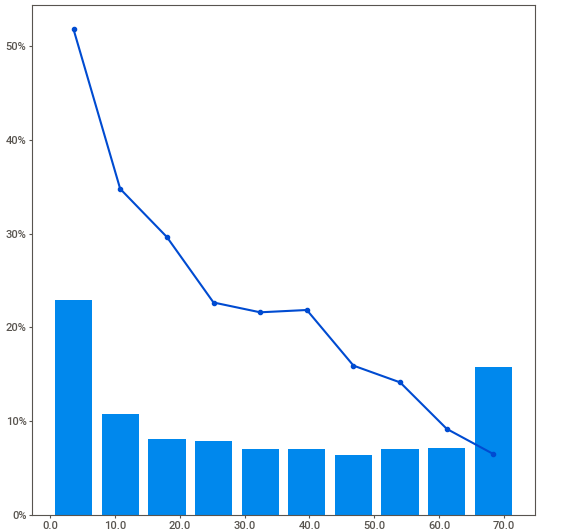
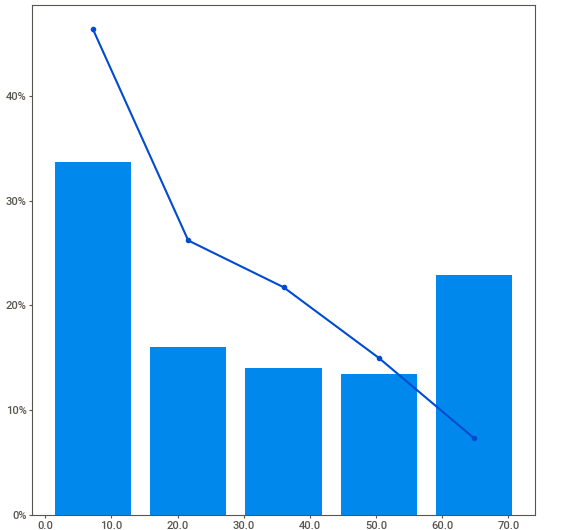
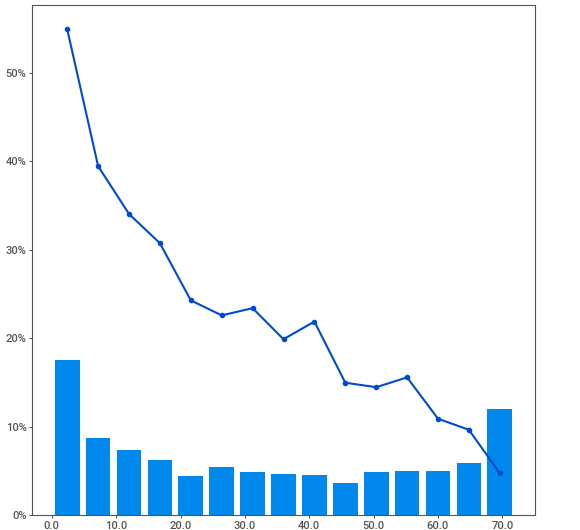
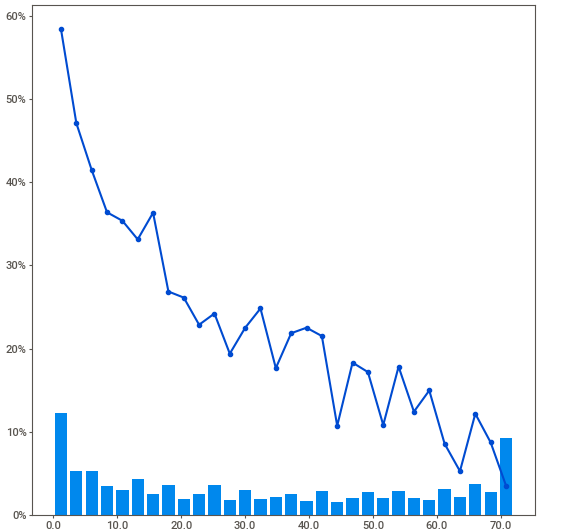
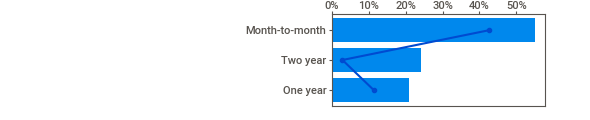
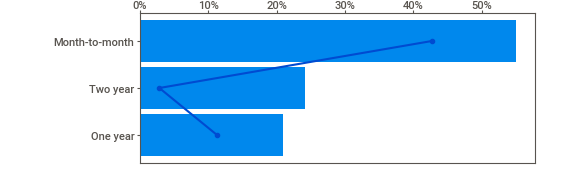
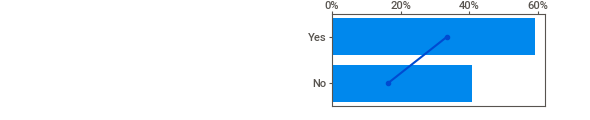
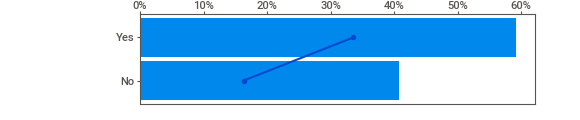
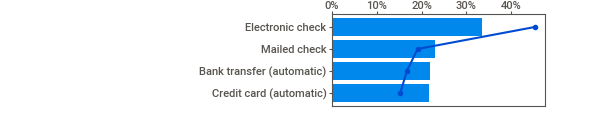
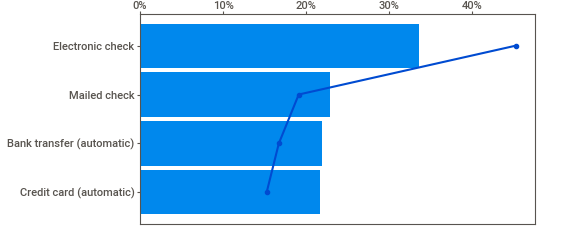
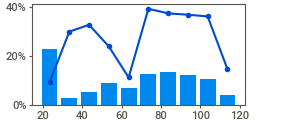
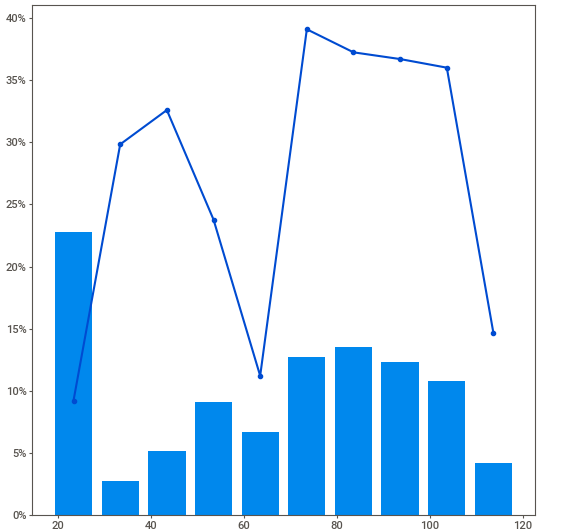
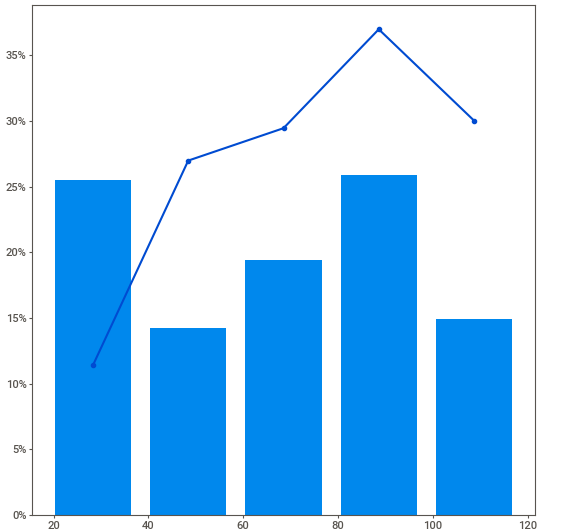
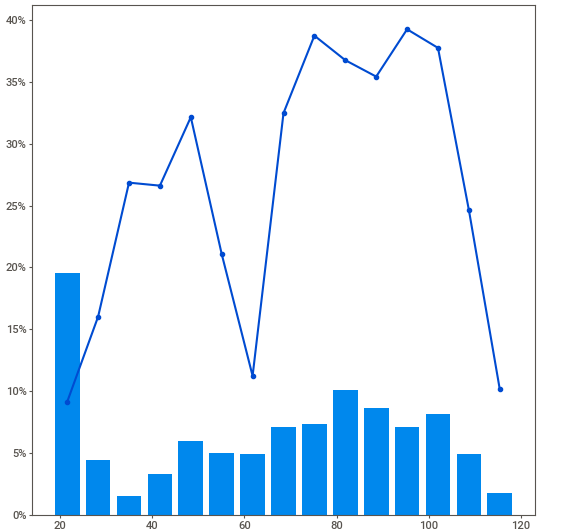
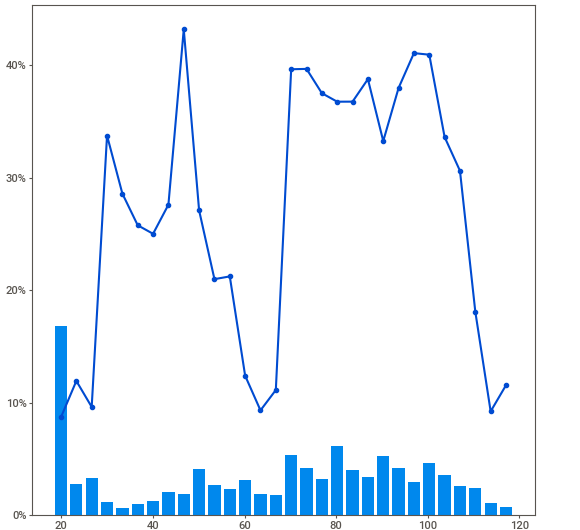
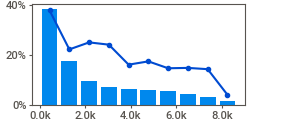
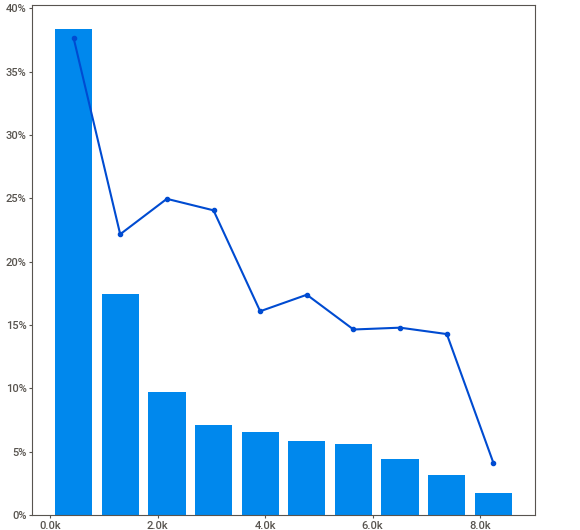
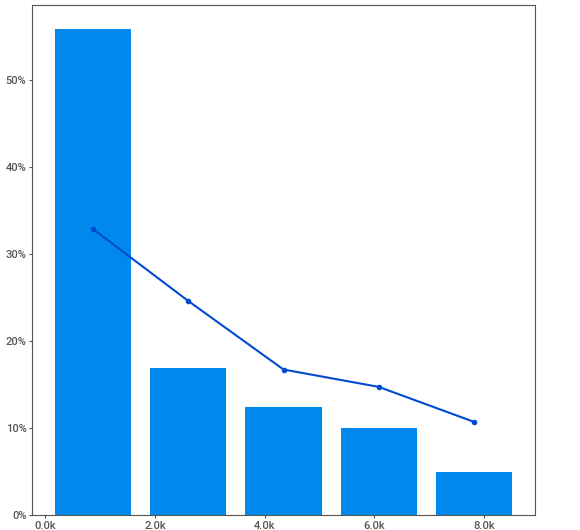
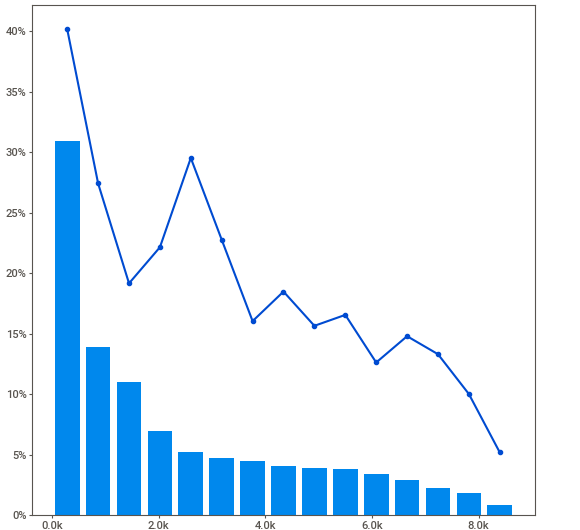
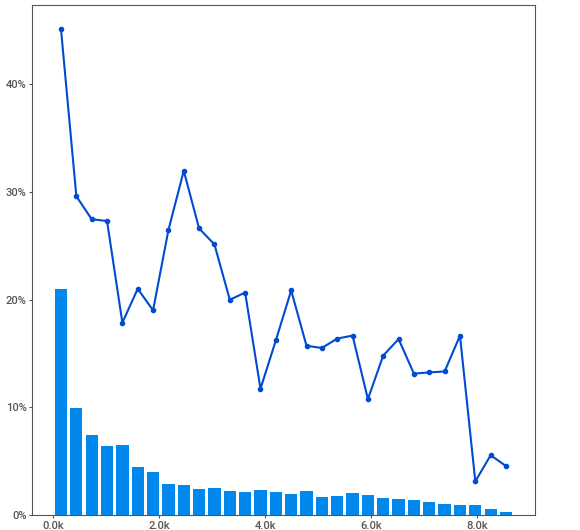
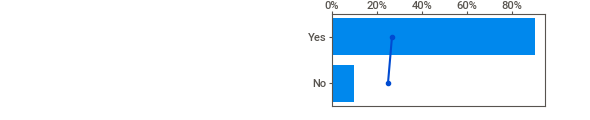
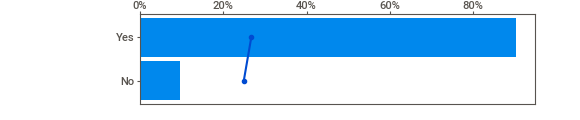
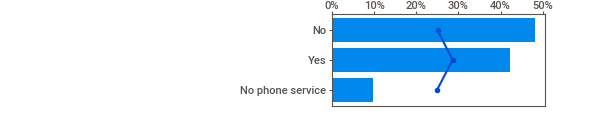
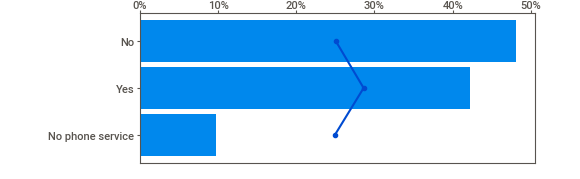
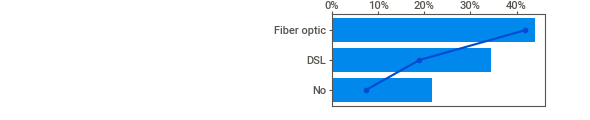
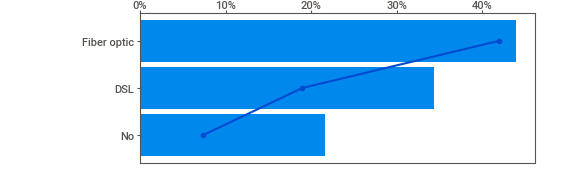
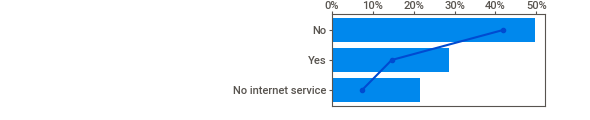
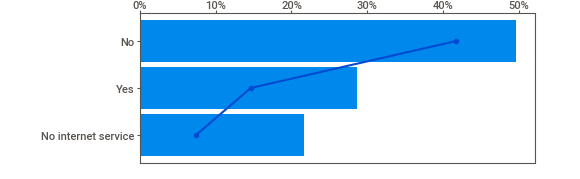
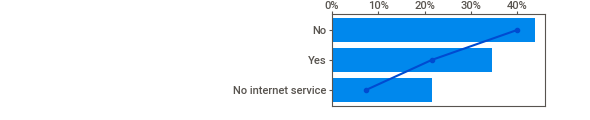
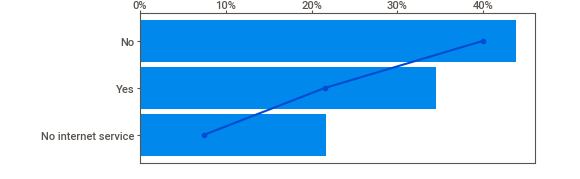
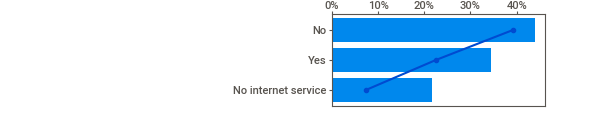
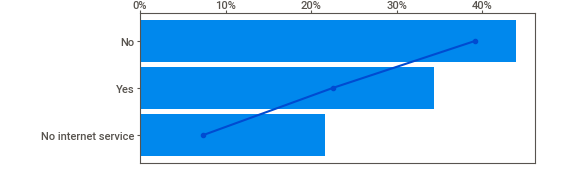
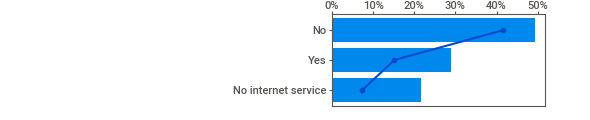
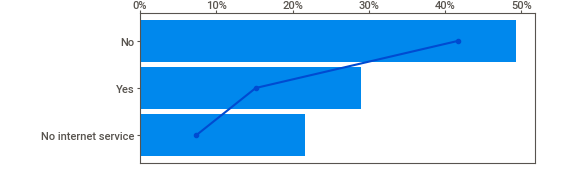
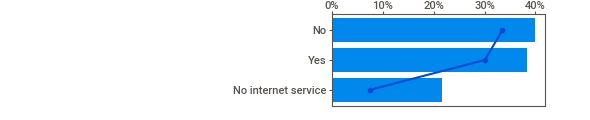
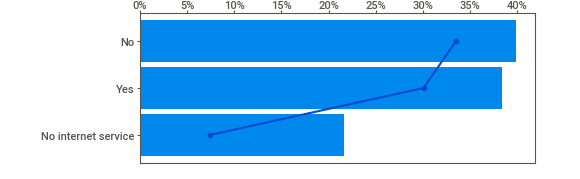
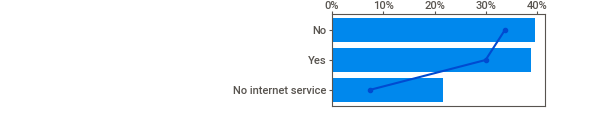
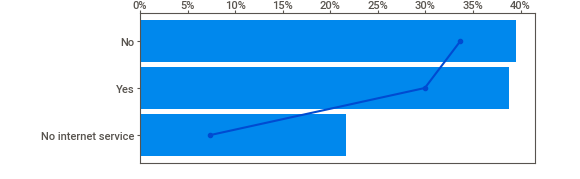
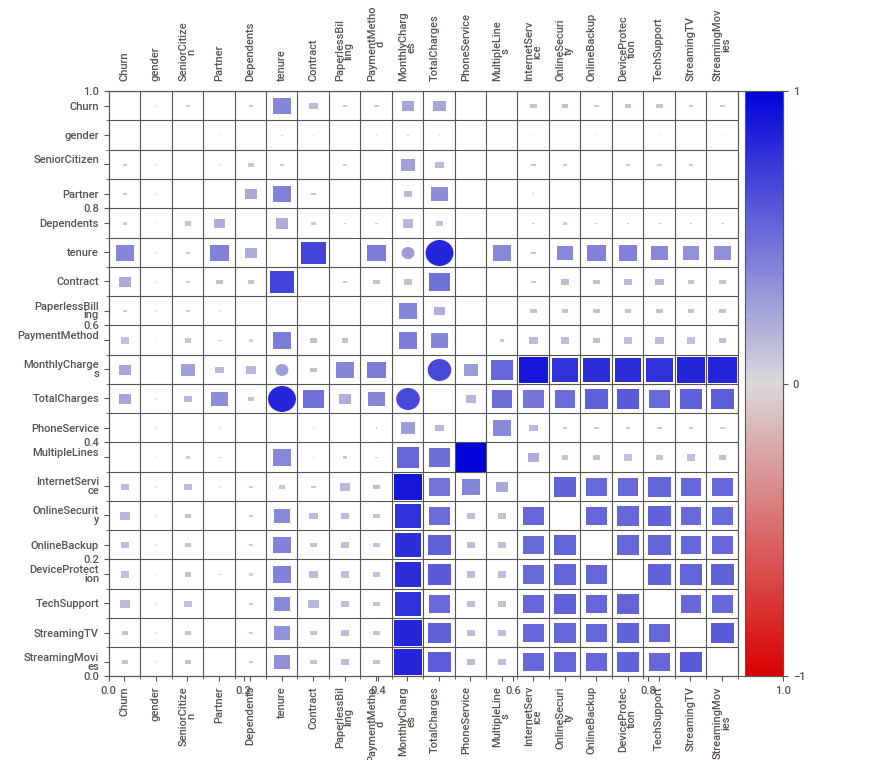
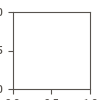

In [15]:
sv_churn_report.show_notebook()